# Ex03 - Intensity Transformations (radiometric operations)

This activity has 2 main objectives:
   - understand what radiometric transformations are and how they can be implemented
   - explore two applications for radiometric transformations: normalization and segmentation.

## Part 1 - Manipulating images

The code below reads the image *flower.pgm* that is stored in the shared folder **Ex03_images** using the PIL/pillow library, displays the image on the screen and transforms it into a numpy array.

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
path = "./exercises/Ex03_imagens/"

Mounted at /content/gdrive


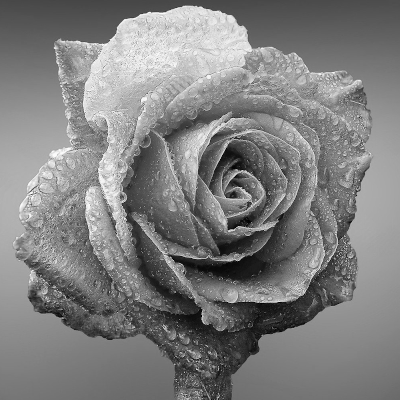

[[ 72  72  72 ...  78  77  77]
 [ 73  72  73 ...  78  78  78]
 [ 73  73  74 ...  78  78  79]
 ...
 [118 117 116 ... 107 107 106]
 [116 115 115 ... 106 106 106]
 [116 116 115 ... 106 106 106]]


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
img_file = path+"flower.pgm"
img = Image.open(img_file)
display(img)

# Converting to a numpy array
f=np.asarray(img)
print(f)

It is very useful to be able to transform Images in PIL into numpy arrays, and vice versa. This will allow us to perform matrix operations on the images and later view (and save to files) the processed images.

### Exercise 3.1.1

(a) Classify the image as monochromatic (binary, grayscale) or multiband (trying to identify the multiband standard adopted). Find out: how deep is the image? What is the highest and lowest pixel intensity value in the image?

In [ ]:
print(f'Shape of the image: {f.shape}')
print(f'Image type: {f.dtype}')
print(f'Highest intensity value of the image: {np.max(f)}')
print(f'Lowest image intensity value: {np.min(f)}')


Shape da imagem: (400, 400)
Tipo da imagem: uint8
Maior valor de intensidade da imagem: 253
Menor valor de intensidade da imagem: 0


Considering that the image has only one channel, it is monochrome. As the pixel intensities range from 0 to 253, it is a grayscale image.

Image depth is 8 bits per pixel (uint8).

Highest pixel intensity value: 253
Lowest pixel intensity value: 0

(b) Read the image *flower.pgm*, show it on the screen and transform it into a numpy array using the matplotlib.image library. Also practice using the colorbar.

[[ 72  72  72 ...  78  77  77]
 [ 73  72  73 ...  78  78  78]
 [ 73  73  74 ...  78  78  79]
 ...
 [118 117 116 ... 107 107 106]
 [116 115 115 ... 106 106 106]
 [116 116 115 ... 106 106 106]]


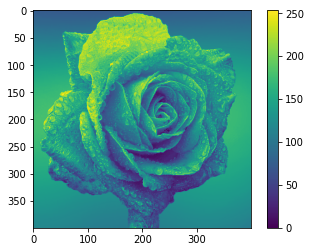

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
g = mpimg.imread(img_file)
imgplot = plt.imshow(g)
plt.colorbar()
print(g)


(c) Using attributes of type [`Image`](https://pillow.readthedocs.io/en/stable/reference/Image.html#image-attributes) from the `PIL` library, try to answer the same questions as in the item (The).

In [ ]:
print(f'Image Shape: {img.size}')
print(f'Image mode: {img.mode}')
print(f'Highest image intensity value: {max(img.getdata())}')
print(f'Lowest image intensity value: {min(img.getdata())}')

Shape da imagem: (400, 400)
Modo da imagem: L
Maior valor de intensidade da imagem: 253
Menor valor de intensidade da imagem: 0


The mode of an image is a string that defines the type and depth of a pixel in the image. Each pixel uses the entire bit depth range.

An 8-bit pixel has a range of 0-255.

L: 8-bit pixels, black and white

### Exercise 3.1.2

Imagine that I think the image is a little too bright and I decide to darken it a little. My first idea would be to subtract a value from each pixel, since smaller values correspond to darker colors.

[[235 235 235 ... 241 240 240]
 [236 235 236 ... 241 241 241]
 [236 236 237 ... 241 241 242]
 ...
 [ 25  24  23 ...  14  14  13]
 [ 23  22  22 ...  13  13  13]
 [ 23  23  22 ...  13  13  13]]


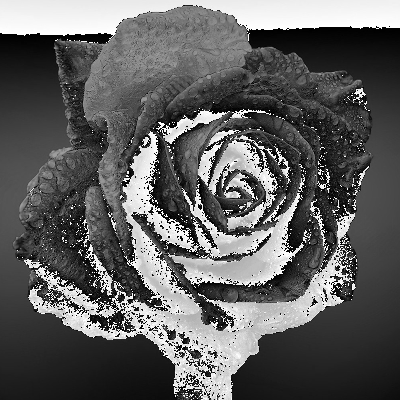

In [ ]:
# I will darken the image by subtracting a value from the pixels in the f array.
g=f-93
print(g)
# Now I will transform the array into a PIL image
g_img=Image.fromarray(g)
# And view the result using the PIL display function
display(g_img)

In [ ]:
print(f.dtype)

uint8


(a) Why did the image become lighter instead of darker? Explain why when subtracting a certain intensity value from the original image, some regions of the image became saturated in white.


*ANSWER:* As the image type (dtype) is uint8, it is only capable of representing values ranging from 0 to 255, and is not capable of representing negative values. When subtracting 93 from values less than 93, and obtaining negative values, the representation returns values below saturation (255).

---
The main message is that we can perform any operations with pixel values, but at the end of the day, if we want to visualize these images, we have to think about how these values will be mapped to an encoding that makes sense in your presentation computer system.


(b) Try to redo this same operation of "darkening" the image through subtraction, without this saturation effect happening.

Esse é o array após subtração em int16:
 [[-1 -1 -1 ...  5  4  4]
 [ 0 -1  0 ...  5  5  5]
 [ 0  0  1 ...  5  5  6]
 ...
 [45 44 43 ... 34 34 33]
 [43 42 42 ... 33 33 33]
 [43 43 42 ... 33 33 33]] 

Esse é o array após o clipping entre 0 e 255:
 [[ 0  0  0 ...  5  4  4]
 [ 0  0  0 ...  5  5  5]
 [ 0  0  1 ...  5  5  6]
 ...
 [45 44 43 ... 34 34 33]
 [43 42 42 ... 33 33 33]
 [43 43 42 ... 33 33 33]] 

Será que vai funcionar?



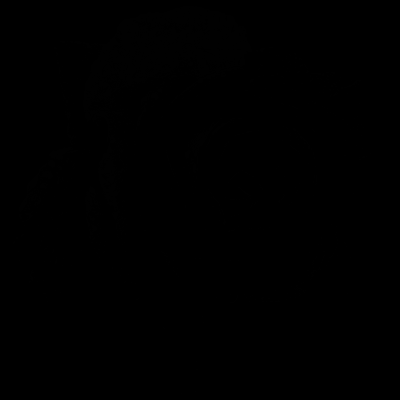


 Não. Não funcionou. Faltou a conversão da matriz para uint8. 



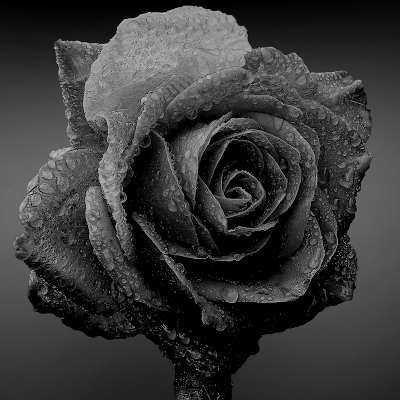

In [ ]:
# Insira seu código aqui

h=f.astype('int16')-73
print('This is the array after subtraction in int16:\n',h,'\n')
h=np.clip(h,0,255)
print('This is the array after clipping between 0 and 255:\n',h,'\n')
h_img=Image.fromarray(h) #This won't work
print("Will it work?\n")
display(h_img)
print("\n No. It didn't work. The matrix conversion to uint8 was missing. \n")
h_img=Image.fromarray(h.astype('uint8')) #Now yes, this will work
display(h_img)

## Part 2 - Intensity Transformation

Intensity transformations or radiometric transformations change the pixel value by applying a mapping function or table. To understand how this is implemented in practice, carefully study the Intensity Transform.


[[ 72  72  72 ...  78  77  77]
 [ 73  72  73 ...  78  78  78]
 [ 73  73  74 ...  78  78  79]
 ...
 [118 117 116 ... 107 107 106]
 [116 115 115 ... 106 106 106]
 [116 116 115 ... 106 106 106]]


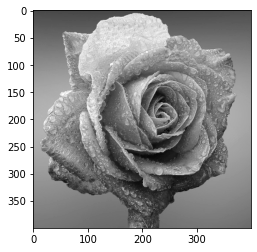

In [ ]:
print(f)
plt.imshow(f,cmap='gray')

Let's practice applying a mapping f = T[f] from a transformation function T. In our case, the function T will be the negative of the image.

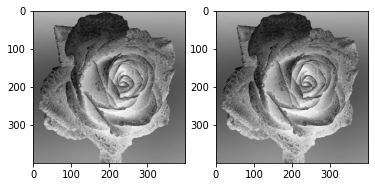

In [ ]:
T = np.arange(256).astype('uint8') # identity function
T1 = 255 - T  # creating the negation function from the identity
#print(T1)
T2 = np.arange(255,-1,-1).astype('uint8') # directly creating the negation function
#print(T2)

plt.subplot(1,2,1)
f1 = T1[f]
plt.imshow(f1,cmap='gray')
plt.subplot(1,2,2)
f2 = T2[f]
plt.imshow(f2,cmap='gray')


### Exercise 3.2.1

Use radiometric transformations to transform the image and identify the license plate number of the car shown in the image below. Explain your reasoning to arrive at the solution.

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


float32


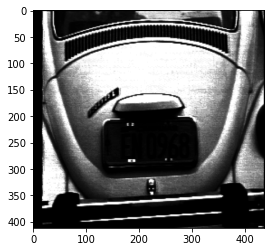

In [ ]:
f = mpimg.imread(path+'fusca.png')  
plt.imshow(f,cmap='gray')
print(f.dtype)

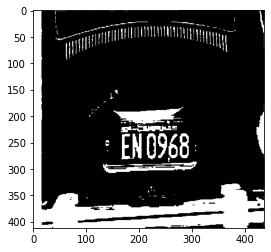

In [ ]:
# Solution 1
s = (255*f).astype('uint8')

T = np.arange(256).astype('uint8') # vector 0 to 255, as the basis of the transformation table
T1 = (T < 1)
s1 = T1[s]

plt.imshow(s1.astype('uint8'), cmap='gray')

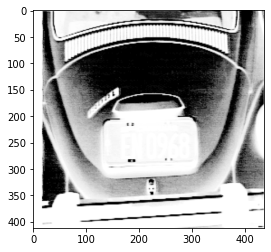

In [ ]:
# Solution 2
T2 = 255 - T
s_neg = T2[s]
plt.imshow(s_neg, cmap='gray')

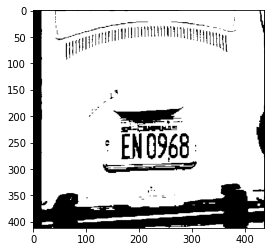

In [ ]:
T3 = (T < 255)
s3 = T3[s_neg]
plt.imshow(s3.astype('uint8'), cmap='gray')

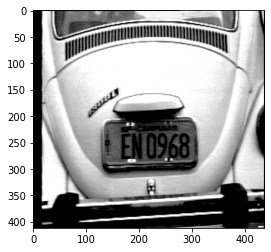

In [ ]:
# Solution 3

T4 = (np.log(T+1.)) # logarithmic - highlight dark parts
s4 = T4[s]
plt.imshow(s4, cmap='gray')

### Exercise 3.2.2

One of the possible applications of radiometric transformations is image segmentation, where we highlight an object of interest from other objects (or the background).

(a) The image below shows two cookies. Choose a threshold value to separate the cookie from the image background. Create a transformation function T and apply this transformation to get the objects of interest (cookies) painted white and the background black.

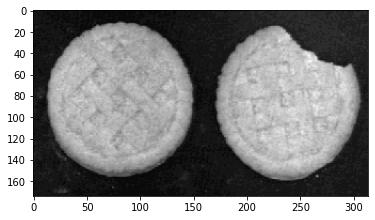

In [ ]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
file_c = path+"cookies.pgm"
plt.subplot(111)  
f = mpimg.imread(file_c)  
plt.imshow(f,cmap='gray')


In [ ]:
def plota_hist(h,cor,nbins,bin_edges):

    w=255./nbins
    bin_centers = bin_edges[1:]-(w/2)
    plt.bar(bin_centers, h, width=w, color=cor)

   

bool


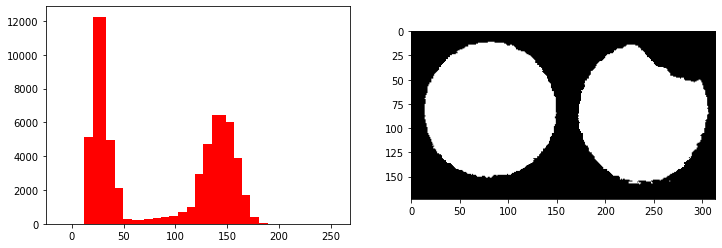

In [ ]:

# A good way to choose the threshold is by looking at the image histogram
hist, bin_edges = np.histogram(f, 256,(0,255))


T = np.arange(256).astype('uint8') # vector 0 to 255, as the basis of the transformation table
T_Threshold = (T > 100) # creates the table for the transformation with threshold 100, lowest=False and highest=Trueg1 = T_Limiar[f]
print(g1.dtype)

fig, axs = plt.subplots(1,2, figsize=(12, 4))

plt.subplot(121)
#plt.plot(hist)
plota_hist(hist,'r',20,bin_edges)
plt.subplot(122)
plt.imshow(g1, cmap='gray')


### Exercise 3.2.3

Read and present the image `orquideafeec-calua.jpg`. Perform intensity processing on the different bands of the image (R, G, B) and present the result. Is it possible to segment the orchid flower using a single color band?

Tip: examples available at [Applying point transforms and Processing individual bands](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html#image-enhancement)

In [ ]:
from PIL import Image

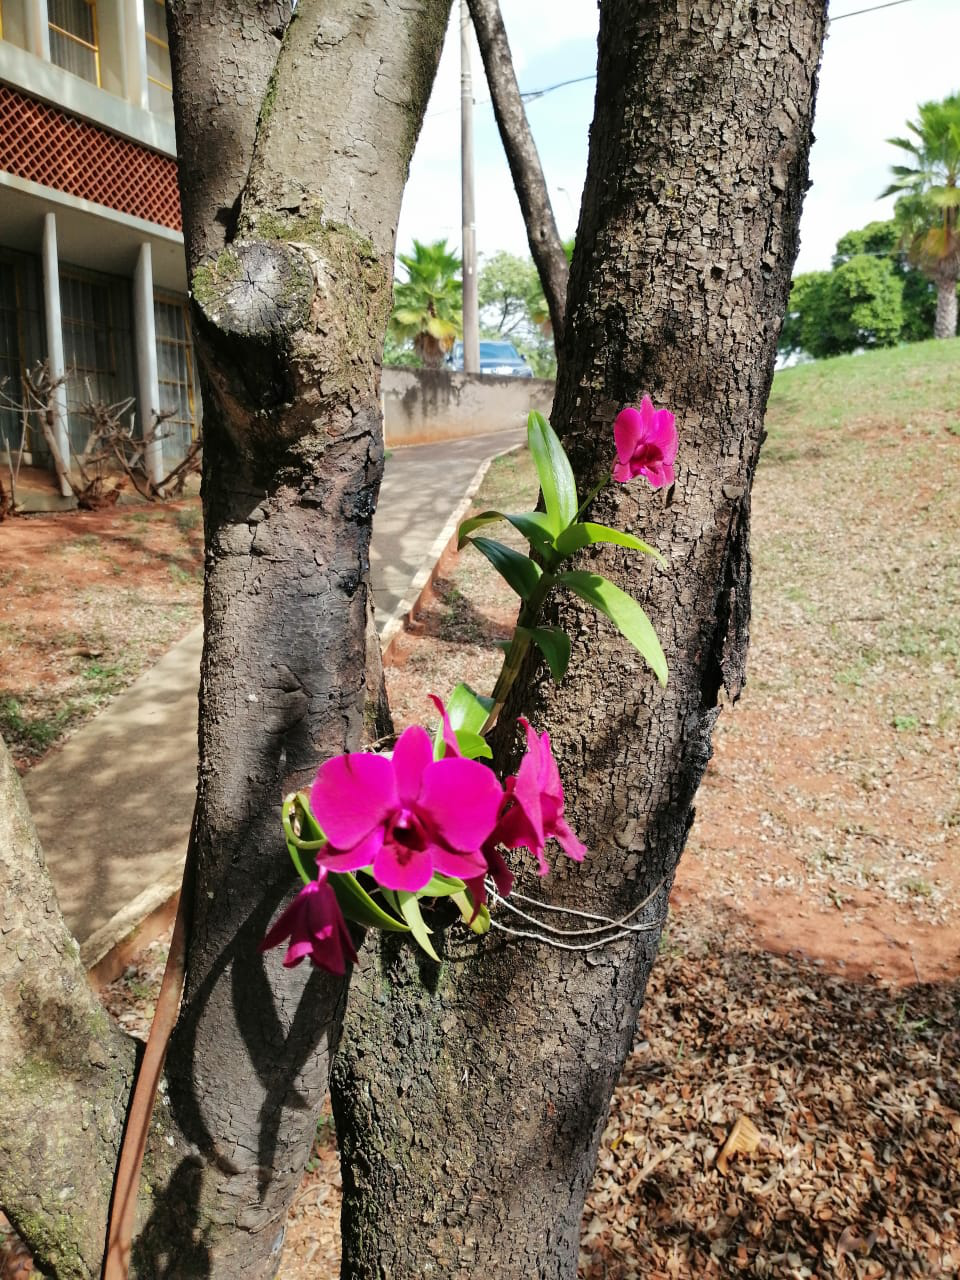

In [ ]:
img = Image.open(path+"/orquideafeec-calua.jpeg")
img

In [ ]:
img_array = np.asarray(img)
nbins=20

#### Using only RGB channels

Checking the image band histograms:

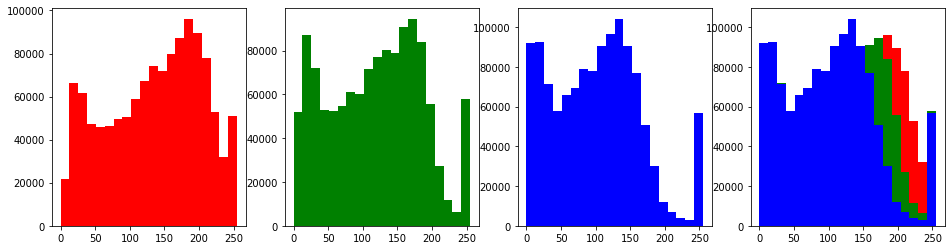

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
plt.subplot(141)
hist,bin_edges = np.histogram(img_array[:,:,0],nbins,(0,255))
plota_hist(hist,'r',nbins,bin_edges) 

plt.subplot(142)
hist,bin_edges = np.histogram(img_array[:,:,1],nbins,(0,255))
plota_hist(hist,'g',nbins,bin_edges) 


plt.subplot(143)
hist,bin_edges = np.histogram(img_array[:,:,2],nbins,(0,255))
plota_hist(hist,'b',nbins,bin_edges)

plt.subplot(144)
hist,bin_edges = np.histogram(img_array[:,:,0],nbins,(0,255))
plota_hist(hist,'r',nbins,bin_edges) 

hist,bin_edges = np.histogram(img_array[:,:,1],nbins,(0,255))
plota_hist(hist,'g',nbins,bin_edges)

hist,bin_edges = np.histogram(img_array[:,:,2],nbins,(0,255))
plota_hist(hist,'b',nbins,bin_edges)

As you only want to segment the flower, it is interesting to check the histograms only for the region of interest (ROI).

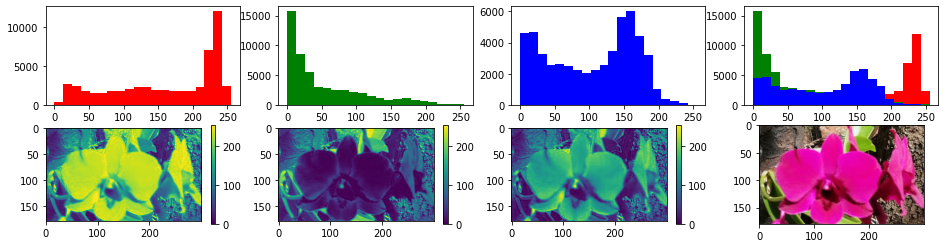

In [ ]:
crop_img = img_array[int(img_array.shape[0]/2)+70:int(img_array.shape[0]/2)+250,int(img_array.shape[1]/2)-200:int(img_array.shape[1]/2)+100,:]


fig, axs = plt.subplots(2, 4, figsize=(16, 4))
plt.subplot(241)
hist,bin_edges = np.histogram(crop_img[:,:,0],nbins,(0,255))
plota_hist(hist,'r',nbins,bin_edges) 

plt.subplot(242)
hist,bin_edges = np.histogram(crop_img[:,:,1],nbins,(0,255))
plota_hist(hist,'g',nbins,bin_edges) 

plt.subplot(243)
hist,bin_edges = np.histogram(crop_img[:,:,2],nbins,(0,255))
plota_hist(hist,'b',nbins,bin_edges) 

plt.subplot(244)
hist,bin_edges = np.histogram(crop_img[:,:,0],nbins,(0,255))
plota_hist(hist,'r',nbins,bin_edges) 

hist,bin_edges = np.histogram(crop_img[:,:,1],nbins,(0,255))
plota_hist(hist,'g',nbins,bin_edges) 

hist,bin_edges = np.histogram(crop_img[:,:,2],nbins,(0,255))
plota_hist(hist,'b',nbins,bin_edges) 

plt.subplot(245)
imgplot = plt.imshow(crop_img[:,:,0])
plt.colorbar()

plt.subplot(246)
imgplot = plt.imshow(crop_img[:,:,1])
plt.colorbar()

plt.subplot(247)
imgplot = plt.imshow(crop_img[:,:,2])
plt.colorbar()

plt.subplot(248)

plt.imshow(crop_img)


Answer: Using a single band it is possible to remove certain things from the image. However, as the clay on the floor of the image has a reddish tone, it is not possible to remove it from the image without removing parts of the orchid together.

The lambda function is used with the help of the point and paste functions to transform the pixels that are far from the orchid's values into black, leaving only the orchid and the tones closest to it blank.

Using only the red band to determine the points to be removed:

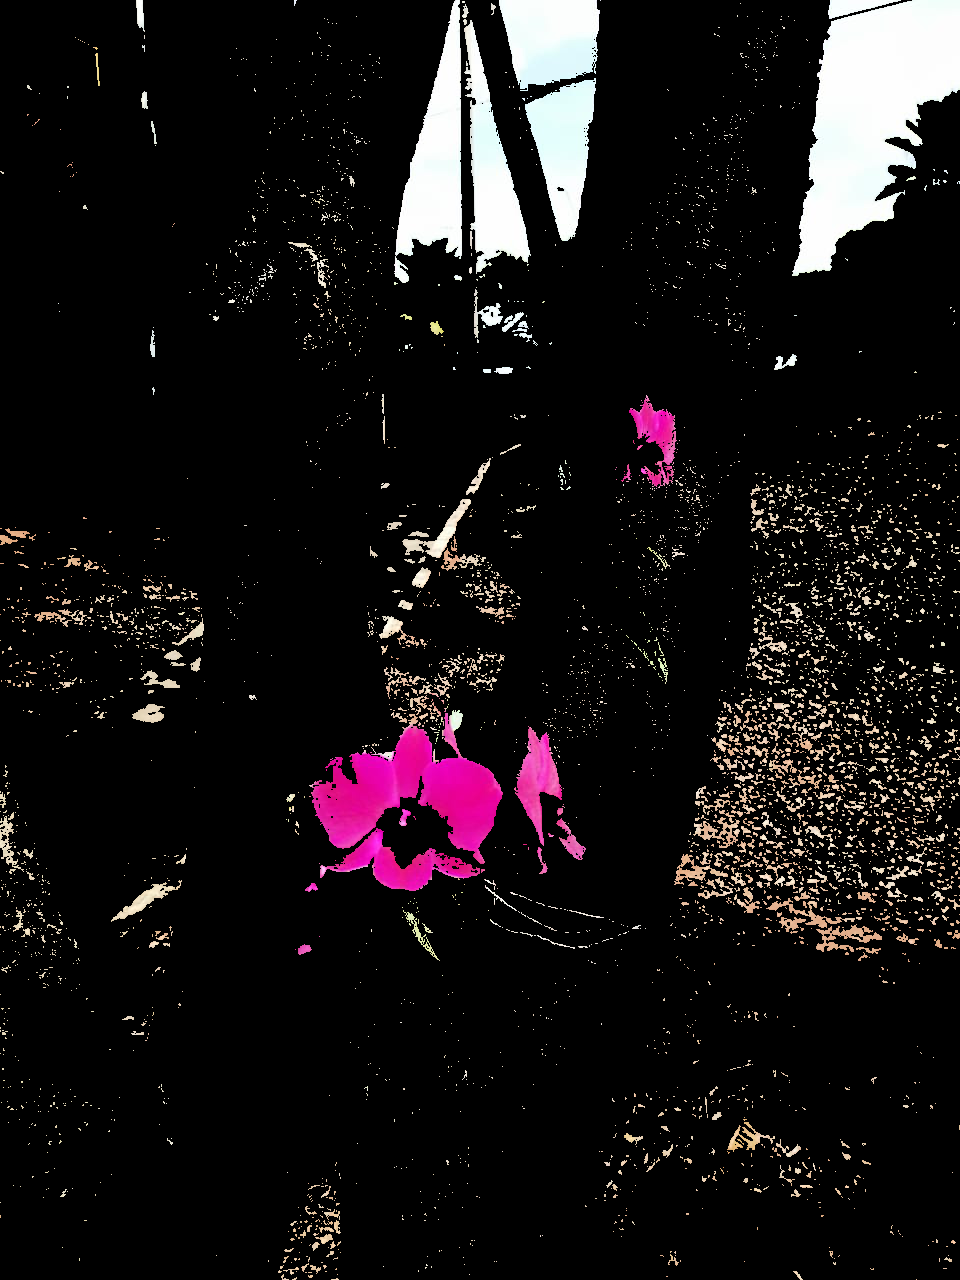

In [ ]:
source = img.split()
img_r = source[0]

mask_r = img_r.point(lambda i: i<220 and 255)

out = img_r.point(lambda i : 0)

img = Image.open(path+"/orquideafeec-calua.jpeg")
img.paste(out, None, mask_r)
display(img)

By using the 3 bands you can remove the sky with the blue band and the greenish points with the green band.

Using the 3 bands to select the points to be removed:

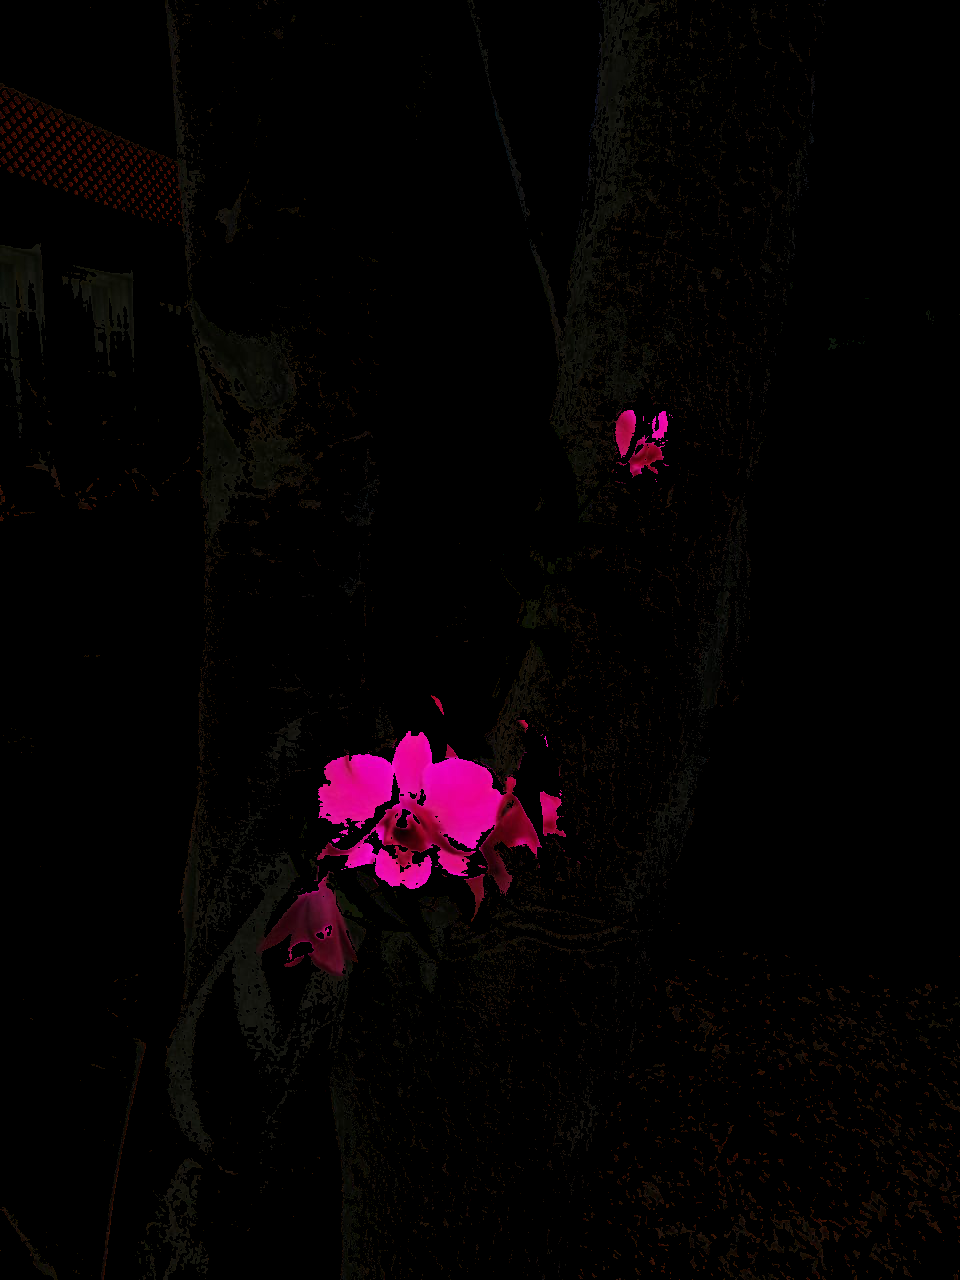

In [ ]:
img_g = source[1]
mask_g = img_g.point(lambda i: i>25 and 255)
out = img_g.point(lambda i : 0)

img = Image.open(path+"/orquideafeec-calua.jpeg")
img.paste(out, None, mask_g)
display(img)

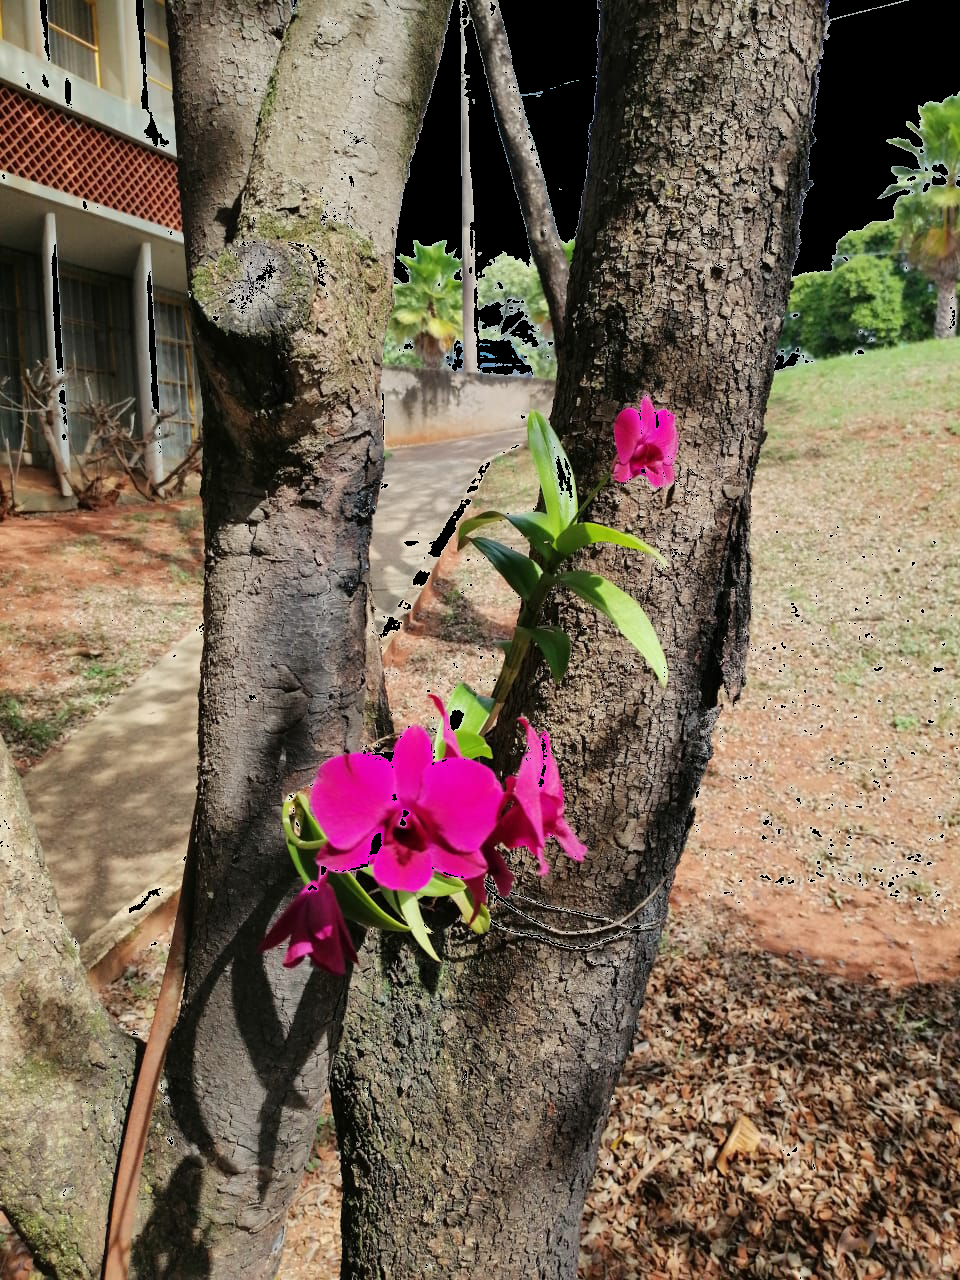

In [ ]:
img_b = source[2]
mask_b = img_b.point(lambda i: i>200 and 255)
out = img_b.point(lambda i : 0)

img = Image.open(path+"/orquideafeec-calua.jpeg")
img.paste(out, None, mask_b)
display(img)

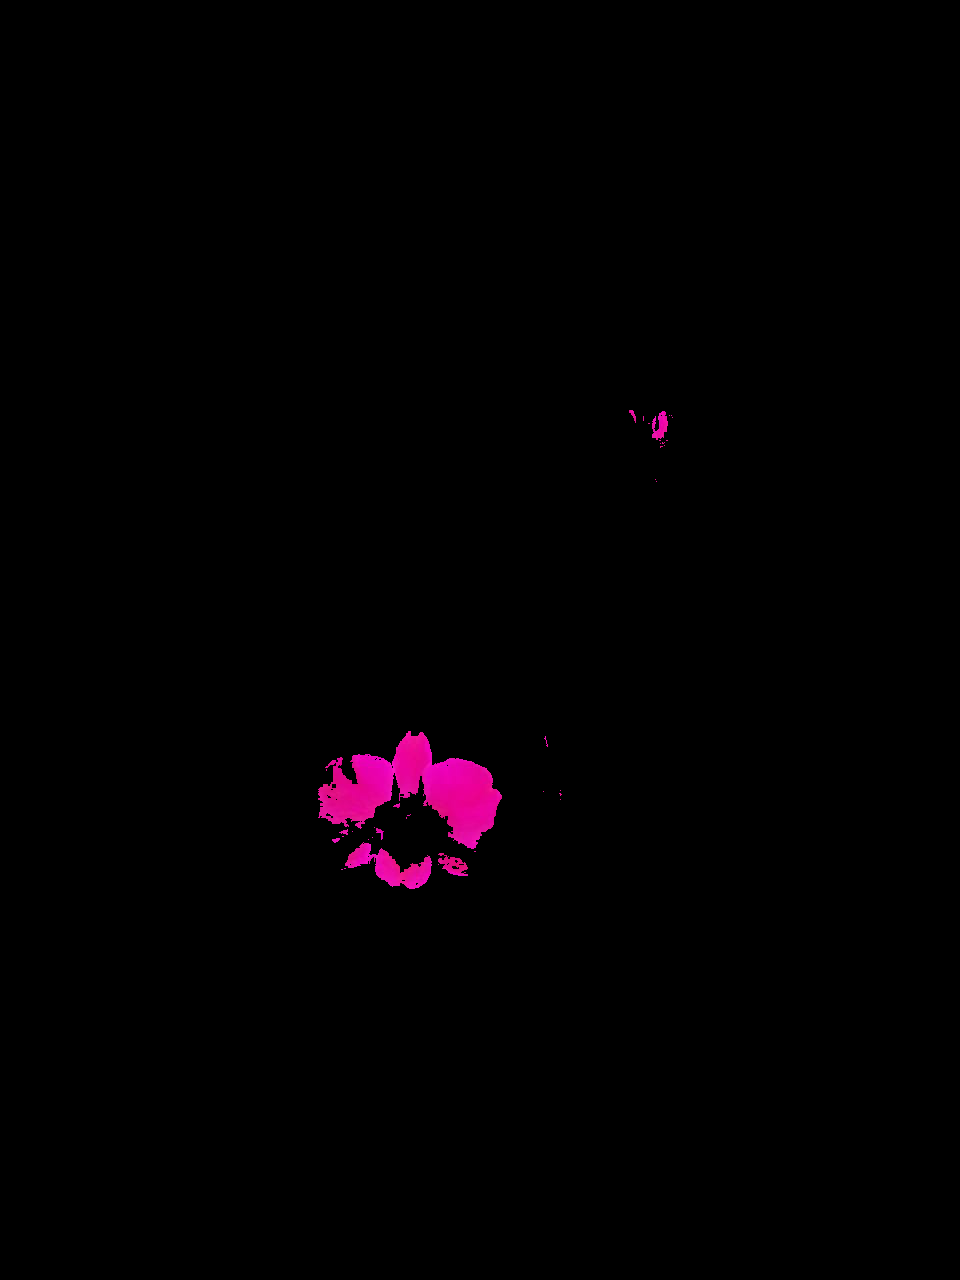

In [ ]:
img = Image.open(path+"/orquideafeec-calua.jpeg")
out = img.point(lambda i : 0)
img.paste(out, None, mask_r)
img.paste(out, None, mask_g)
img.paste(out, None, mask_b)
display(img)

#### Using RGB -> HSV conversion

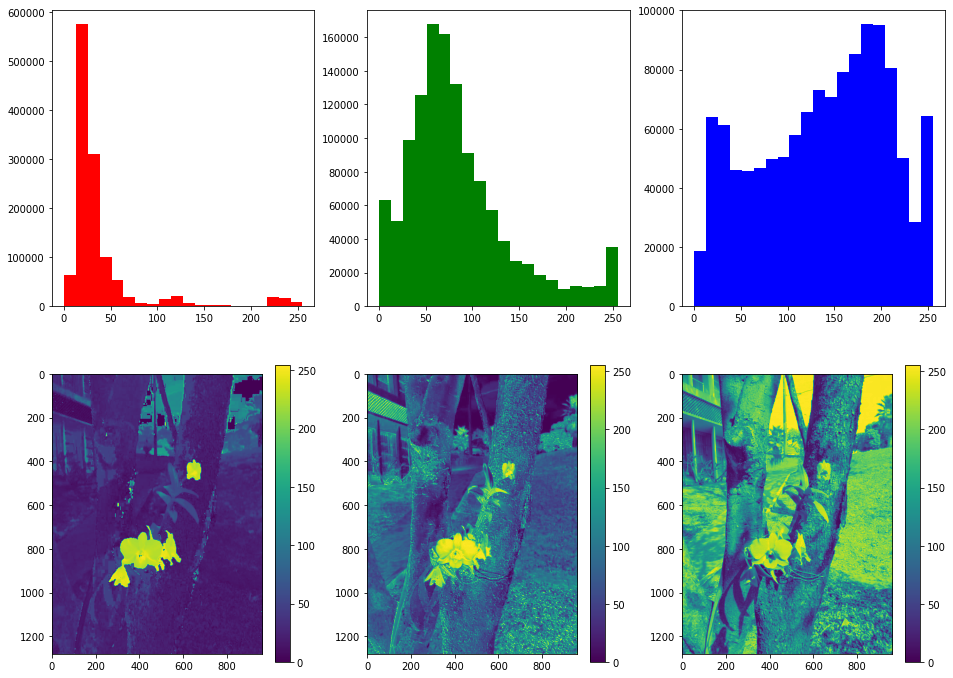

In [ ]:
# Division of channels
img = Image.open(path+"/orquideafeec-calua.jpeg")
hsv_img = img.convert('HSV')
hsv_source = hsv_img.split()

h = np.asarray(hsv_source[0])
s = np.asarray(hsv_source[1])
v = np.asarray(hsv_source[2])

fig, axs = plt.subplots(2, 3, figsize=(16, 12))

plt.subplot(231)
hist,bin_edges = np.histogram(h,nbins,(0,255))
plota_hist(hist,'r',nbins,bin_edges) 

plt.subplot(232)
hist,bin_edges = np.histogram(s,nbins,(0,255))
plota_hist(hist,'g',nbins,bin_edges)

plt.subplot(233)
hist,bin_edges = np.histogram(v,nbins,(0,255))
plota_hist(hist,'b',nbins,bin_edges)

plt.subplot(234)
imgplot = plt.imshow(h)
plt.colorbar()

plt.subplot(235)
imgplot = plt.imshow(s)
plt.colorbar()

plt.subplot(236)
imgplot = plt.imshow(v)
plt.colorbar()

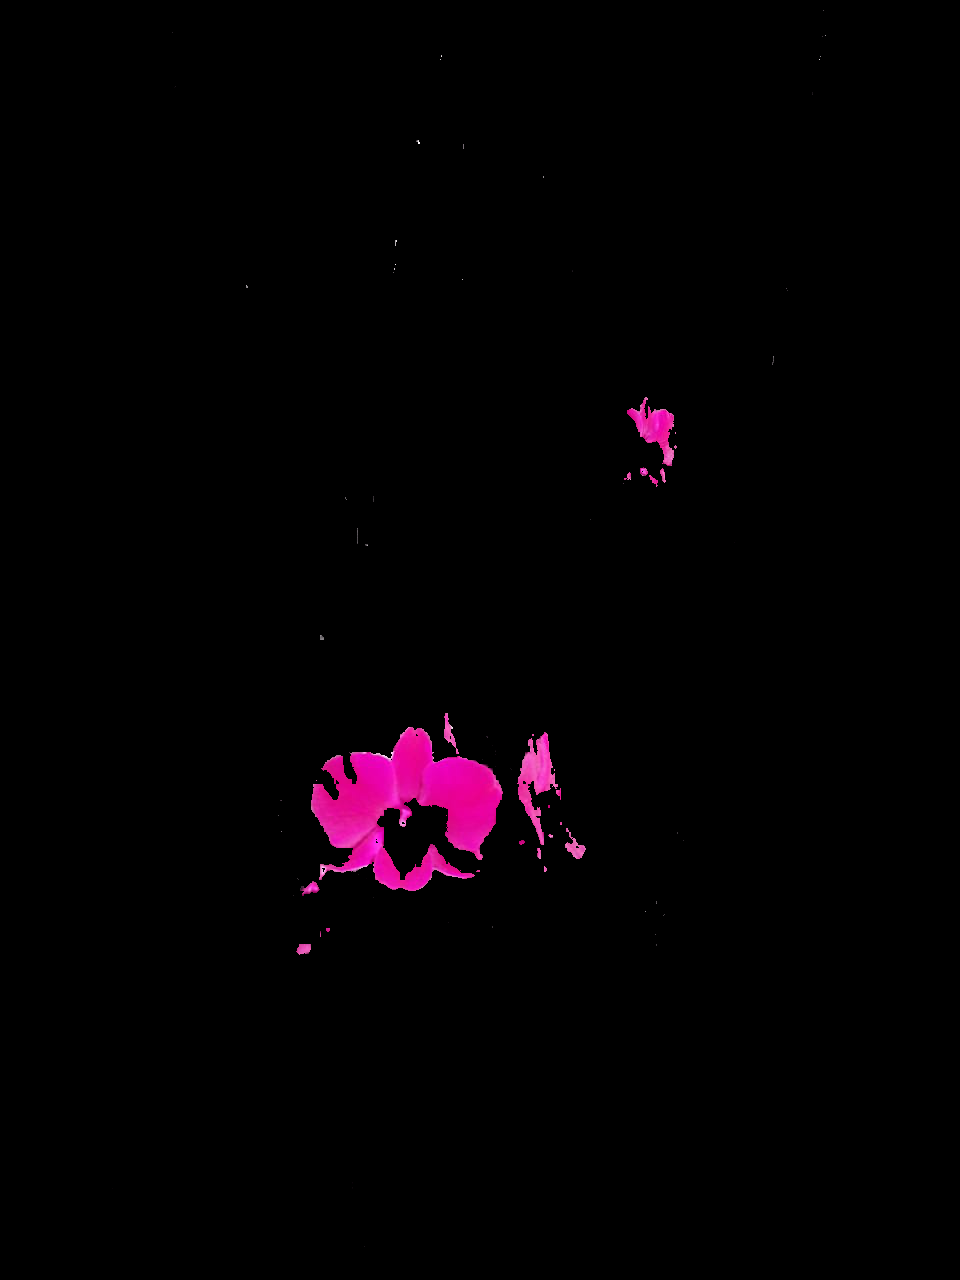

In [ ]:
img_h = hsv_source[0]
mask_h = img_h.point(lambda i: (i<215 or i>230) and 255)
out = img_h.point(lambda i : 0)

img = Image.open(path+"/orquideafeec-calua.jpeg")
img.paste(out, None, mask_h)
display(img)

# References


- [Image Matplotlib Tutorial](https://matplotlib.org/3.5.0/tutorials/introductory/images.html)
- [Image Attributes](https://pillow.readthedocs.io/en/stable/reference/Image.html#image-attributes)
- [Application of transforms and processing of individual bands](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html#image-enhancement)
- [Intensity Transform Tutorial](https://github.com/lrittner/Computacao-Visual/blob/master/master/tutorial_ti_2.ipynb)